In [1]:
# Importing the libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import sys
import pandas as pd
from scipy.stats import binned_statistic
plt.style.use('presentation')
%matplotlib notebook

In [2]:
# Importing the dataset
dataset = pd.read_csv('float_quality.csv')
dataset.head()
dataset.columns

Index(['Temp', 'logg', '[Fe/H]', 'Alpha', 'Band', 'Resolution', 'vsini',
       'Sampling', 'Quality', 'Cond1', 'Cond2', 'Cond3', 'correctflag'],
      dtype='object')

In [3]:
# Select features in the catalog
# dataset = dataset[['Temp', 'logg', '[Fe/H]', 'Alpha',
#                    'Resolution', 'Band', 'vsini', 'Sampling',
#                    'Quality']]
dataset = dataset[['Temp', 'logg', '[Fe/H]', 
                   'Resolution', 'Band', 'vsini',
                   'Quality']]
# Importance: Alpha 0 ; Sampling 0
# Removes the lines with NaN values 
dataset = dataset.dropna(axis=0, how='any')
# dataset.describe()
print('Number of entries: ', len(dataset))
dataset.head()

Number of entries:  7200


,Temp,logg,[Fe/H],Resolution,Band,vsini,Quality
0,4200,4.0,-1.0,60000,0.90,1.0,2899
1,4200,4.0,-1.0,60000,0.90,5.0,1946
2,4200,4.0,-1.0,60000,0.90,10.0,1141
3,4200,4.0,-1.0,60000,1.25,1.0,1543
4,4200,4.0,-1.0,60000,1.25,5.0,1090


In [4]:
# Separating the data into dependent and independent variables
features = dataset.iloc[:, :-1].values
labels = dataset.iloc[:, -1].values
print(features.shape)
print(labels.shape)
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features)
features2 = scaler.transform(features)
# X_test_non_std = scaler.inverse_transform(X_test)
features2 = features

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features2, labels, test_size=0.15, random_state=0)

display(features)

(7200, 6)
(7200,)


array([[ 4.20e+03,  4.00e+00, -1.00e+00,  6.00e+04,  9.00e-01,  1.00e+00],
       [ 4.20e+03,  4.00e+00, -1.00e+00,  6.00e+04,  9.00e-01,  5.00e+00],
       [ 4.20e+03,  4.00e+00, -1.00e+00,  6.00e+04,  9.00e-01,  1.00e+01],
       ...,
       [ 2.30e+03,  5.50e+00,  1.00e+00,  1.00e+05,  1.02e+00,  1.00e+00],
       [ 2.30e+03,  5.50e+00,  1.00e+00,  1.00e+05,  1.02e+00,  5.00e+00],
       [ 2.30e+03,  5.50e+00,  1.00e+00,  1.00e+05,  1.02e+00,  1.00e+01]])

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
regr = RandomForestRegressor(n_estimators=141, max_depth=9, random_state=0)  # 50 - 4/9
regr.fit(X_train, y_train)
quality_RF = regr.predict(X_test)
print(r2_score(y_test, quality_RF))
print(dataset.columns)
regr.feature_importances_

0.9815743576794886
Index(['Temp', 'logg', '[Fe/H]', 'Resolution', 'Band', 'vsini', 'Quality'], dtype='object')


array([0.31779357, 0.01758899, 0.04956494, 0.05695969, 0.24176283,
       0.31632998])

Random forest:    348375.78245946974


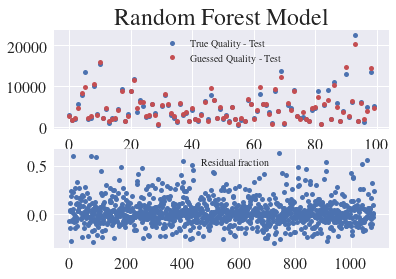

In [6]:
plt.figure()
plt.subplot(211)
plt.title("Random Forest Model")
plt.plot(y_test[:100], '.', label='True Quality - Test')
plt.plot(quality_RF[:100], 'r.', label='Guessed Quality - Test')
#plt.plot(y_test, '.', label='True quality Test')
#plt.plot(quality_RF, 'r.', label='Guessed quality Test')
plt.legend()
plt.subplot(212)
plt.plot((quality_RF-y_test)/ y_test, '.',label='Residual fraction')
plt.legend()
print('Random forest:   ', np.mean((y_test - quality_RF)**2))
plt.legend()

Random forest:    348375.78245946974


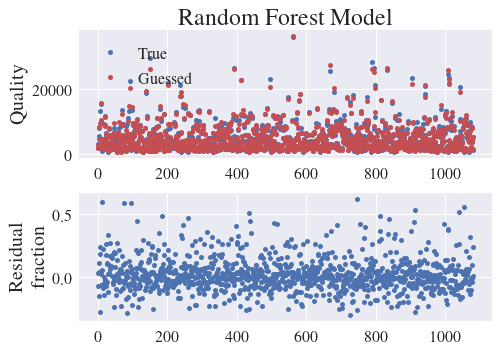

In [22]:
plt.figure(figsize=(7,5))
plt.subplot(211)
plt.title("Random Forest Model")
plt.plot(y_test, '.', label='True')
plt.plot(quality_RF, 'r.', label='Guessed')
#plt.plot(y_test, '.', label='True quality Test')
#plt.plot(quality_RF, 'r.', label='Guessed quality Test')
plt.ylabel("Quality")
plt.legend(fontsize=16, )
plt.subplot(212)
plt.plot((quality_RF-y_test)/ y_test, '.',label='Residual fraction')
#plt.legend(fontsize=16)

print('Random forest:   ', np.mean((y_test - quality_RF)**2))
#plt.legend(fontsize=16)
plt.tight_layout()
plt.ylabel("Residual\nfraction")
plt.savefig("random_forest_model.pdf")

In [7]:
def col_index(df, colname):
    return (df.columns == colname).nonzero()[0][0]

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Index(['Temp', 'logg', '[Fe/H]', 'Resolution', 'Band', 'vsini', 'Quality'], dtype='object')


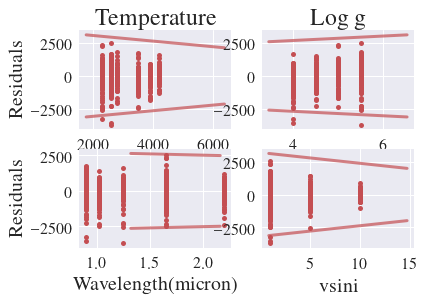

In [8]:
print(dataset.columns)

plt.figure()
plt.subplot(221)
plt.title(r'Temperature')
x_abs = X_test[:,col_index(dataset, "Temp")]
plt.plot(x_abs, quality_RF - y_test, 'r.')
bins = np.logspace(-1,4,10, base=10)
dbins = np.ediff1d(bins)
x = bins[:-1] + dbins/2
plt.plot(x, binned_statistic(x_abs, quality_RF - y_test, bins=bins, statistic=np.ptp)[0]/2, 'r', alpha=0.7)
plt.plot(x, -binned_statistic(x_abs, quality_RF - y_test, bins=bins, statistic=np.ptp)[0]/2, 'r', alpha=0.7)
plt.ylabel(r'Residuals')
plt.legend()

plt.subplot(222)
plt.title(r'Log g')
x_abs = X_test[:,col_index(dataset, "logg")]
plt.plot(x_abs, quality_RF - y_test, 'r.')
bins = np.logspace(-1,7,30, base=10)
dbins = np.ediff1d(bins)
x = bins[:-1] + dbins/2
plt.plot(x, binned_statistic(x_abs, quality_RF - y_test, bins=bins, statistic=np.ptp)[0]/2, 'r', alpha=0.7)
plt.plot(x, -binned_statistic(x_abs, quality_RF - y_test, bins=bins, statistic=np.ptp)[0]/2, 'r', alpha=0.7)
plt.legend()

plt.subplot(223)
x_abs = X_test[:,col_index(dataset, "Band")]
plt.plot(x_abs, quality_RF - y_test, 'r.')
bins = np.logspace(0.,3,15, base=10)
dbins = np.ediff1d(bins)
x = bins[:-1] + dbins/2
plt.plot(x, binned_statistic(x_abs, quality_RF - y_test, bins=bins, statistic=np.ptp)[0]/2, 'r', alpha=0.7)
plt.plot(x, -binned_statistic(x_abs, quality_RF - y_test, bins=bins, statistic=np.ptp)[0]/2, 'r', alpha=0.7)
plt.xlabel(r'Wavelength(micron)')
plt.ylabel(r'Residuals')
plt.legend()

plt.subplot(224)
x_abs = X_test[:,col_index(dataset, "vsini")]
plt.plot(x_abs, quality_RF - y_test, 'r.')
bins = np.logspace(-1,10,10, base=10)
dbins = np.ediff1d(bins)
x = bins[:-1] + dbins/2
plt.plot(x, binned_statistic(x_abs, quality_RF - y_test, bins=bins, statistic=np.ptp)[0]/2, 'r', alpha=0.7)
plt.plot(x, -binned_statistic(x_abs, quality_RF - y_test, bins=bins, statistic=np.ptp)[0]/2, 'r', alpha=0.7)
plt.xlabel(r'vsini')
plt.legend()

In [9]:
(dataset.columns == "Band").nonzero()[0]

array([4])

In [10]:
np.logspace?

In [11]:
binned_statistic?

In [12]:
np.ptp?